<H1>Dataset Loading and Interaction Extraction</h1>

In [65]:
class Sentence:
    def __init__(self):
        self.text = ""
        self.proteins = []
        self.interactions = []
        self.reconstructedText = ""
        self.words = []
        self.valid = False

    def show(self):
        print(self.text)
        print(self.proteins)
        if len(self.interactions):
            for i in self.interactions:
                print(i)
        print()
        
        
    def processText(self):
        #self.text = self.text.replace("_/_","_ _")
        #self.text = self.text.replace("_:_","_ _")
        #self.text = self.text.replace("_-_","_ _")
        self.text = re.sub("(\_[^_]_)", "_ _", self.text)#regexp to remove things like _:_
        self.text = self.text.replace("(_","_")
        self.text = self.text.replace("_)","_")
    
    def checkValidity(self):
        count = 0
        for w in range(len(self.words)):
            if "__" in self.words[w]:
                count = count +1
        
        if count == len(self.proteins):
            self.valid = True
            #print(self.valid)
        
    
    def reconstructText(self):
        self.words = self.text.split(" ")
        self.checkValidity()
        #print(self.words)
        if self.valid:
            p=0
            for w in range(len(self.words)):
                if "__" in self.words[w]:
                    self.words[w] = self.proteins[p]
                    #self.words[w] = "PROTEIN"+str(p)
                    p=p+1
            #print(self.words)
            #print()
        
    def reassembleSentence(self):
        print(" ".join(self.words))
        
    def fullProcess(self):
        self.processText()
        self.reconstructText()
        

In [66]:
import pickle

with open('datasetTrain.pkl', 'rb') as input1:
    trainSetRaw = pickle.load(input1)
    
with open('datasetTest.pkl', 'rb') as input2:    
    testSetRaw = pickle.load(input2)
    
try:
    print(len(trainSetRaw))
    print(len(testSetRaw))
except NameError:
    print("nope")   

2245
529


In [67]:
def findMaxWords(inputList):
    maxwords = -1 
    for i in inputList:
        if len(i.words)>maxwords:
            maxwords = len(i.words)
    print(maxwords)
    

In [68]:
findMaxWords(trainSetRaw)
findMaxWords(testSetRaw)

93
74


<h1>Maximum Words In Sentence</h1>

We start out with
2245 training examples
529 test examples

mean 24.980894015861573
std 10.856406734698178
80 words: 2770
70 words: 2766
60 words: 2751
50 words: 2697
48 words: 2674
40 words: 2544
30 words: 2086

Selecting for under 48 words we are left with
2186 training examples
511 test examples


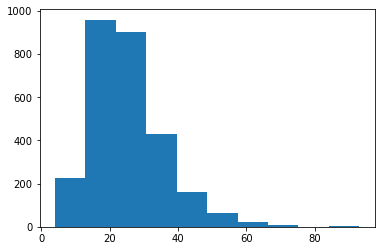

In [69]:
print("We start out with")

print(len(trainSetRaw),"training examples")
print(len(testSetRaw),"test examples")

print()

allSet = [len(x.words) for x in trainSetRaw+testSetRaw]

from matplotlib import pyplot as plt 
import numpy as np  

print("mean",np.mean(allSet))

print("std",np.std(allSet))

plt.hist(allSet)



selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=80 ]

print("80 words:",len(selectedSet))


selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=70 ]

print("70 words:",len(selectedSet))

selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=60 ]

print("60 words:",len(selectedSet))


selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=50 ]

print("50 words:",len(selectedSet))

selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=48 ]

print("48 words:",len(selectedSet))


selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=40 ]

print("40 words:",len(selectedSet))

selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=30 ]

print("30 words:",len(selectedSet))


#HERE
maxSentenceWords = 50

trainSetRaw = [x for x in trainSetRaw if len(x.words)<=maxSentenceWords]
testSetRaw = [x for x in testSetRaw if len(x.words)<=maxSentenceWords]


print()
print("Selecting for under 48 words we are left with")
print(len(trainSetRaw),"training examples")
print(len(testSetRaw),"test examples")

In [70]:
print(trainSetRaw[0])
print()

print(trainSetRaw[0].text)
print()

print(trainSetRaw[0].words)
print()

print(trainSetRaw[0].proteins)



print(len('protein0'))


Cytokines measurements during _________ treatment showed a trend to decreasing levels of ____ at 4, 12, and 24 weeks.

['Cytokines', 'measurements', 'during', 'PROTEIN0', 'treatment', 'showed', 'a', 'trend', 'to', 'decreasing', 'levels', 'of', 'PROTEIN1', 'at', '4,', '12,', 'and', '24', 'weeks.']

['PROTEIN0', 'PROTEIN1']
8


In [71]:
import string
string.ascii_letters

import random
random.choice(string.ascii_letters)

def genRandomWord():
    word = ''
    for letter in range(random.randint(3,9)):
        word+=random.choice(string.ascii_letters)
        
    return word
        

for i,v in enumerate(range(10)):
    print(i,genRandomWord())

0 lrPEUOCs
1 DOnfM
2 NwMJl
3 XKMQghT
4 ounTggN
5 favlGaBP
6 HIGdsihdW
7 Sjbzkz
8 ffO
9 syUUl


In [72]:
import re

re.sub('PROTEIN[0-9]',genRandomWord(),'PROTEINA PROTEIN1 PROTEIN2 is a sentence')




'PROTEINA AwLh AwLh is a sentence'

In [73]:
proteins = ["Actin","Albumins","Alpha globulin","Arp2/3","Beta globulin","C-myc","C-reactive protein","C1-inhibitor","C3-convertase","CFTR","Cadherin","Calcium channels","Carboxypeptidase","Collagen","Coronin","Dystrphin","Elastin","Ependymin","Estrogen receptor","F-spondin","FOXP2","FOXP3","Factor VIII","Factor XIII","Ferritin","Fibrin","Fibronectin","Gamma globulin","Glucose transporter","Glycophorin D","GroEL ","Hemoglobin","Histones","Hydrolases","IgA","IgD","IgE","IgG","IgM","Insulin","Integrin","Keratin","Muscarinic acetylcholine receptor","MyoD","Myoglobin","Myosin","NCAM","Nebulin","Nicotinic acetylcholine receptor","Oxidoreductases","Oxytocin","P53","Pikachurin","Potassium channels","Protein C","Protein S","Protein Z","Protein Z-related protease inhibitor","Rhodopsin","Scramblase","Selectin","Serum Amyloid P Component","Serum albumin","Sodium channels","Spectrin","Tau","Thrombin","Titin","Transferases","Tropomyosin","Tubulin","Von Willebrand Factor"]

import random

def genRandomProtein():
    return random.choice(proteins)
        

for i,v in enumerate(range(10)):
    print(i,genRandomProtein())

0 Alpha globulin
1 Factor XIII
2 Beta globulin
3 Protein Z
4 IgE
5 Scramblase
6 IgA
7 Tau
8 Ependymin
9 Calcium channels


In [74]:
for i in range(10):
    print('PROTEIN'+str(i))

PROTEIN0
PROTEIN1
PROTEIN2
PROTEIN3
PROTEIN4
PROTEIN5
PROTEIN6
PROTEIN7
PROTEIN8
PROTEIN9


In [75]:
trainSet = []
trainLabel = []

for example in trainSetRaw:
    #print(example.words)
    for interaction in example.interactions:
        sentence =" ".join(example.words)
        
        #print(sentence)
        #print()
        
        if interaction[2] == "True":
            trainLabel = trainLabel + [1]
            #print("HIT")
        else:
            trainLabel = trainLabel + [0]
            #print("MISS")
        
        sentence = sentence.replace(interaction[0],'PROTEINA')
        sentence = sentence.replace(interaction[1],'PROTEINB')
        for i in range(10):
            sentence = sentence.replace('PROTEIN'+str(i),genRandomProtein())
        #sentence = re.sub('PROTEIN[0-9]',genRandomWord(),sentence)
        
        #print(sentence)
        #print()
        #print()
        
        trainSet = trainSet + [sentence]    
            
    #print()
    
    
print(len(trainSet))
print(len(trainLabel))

10394
10394


In [76]:
testSet = []
testLabel = []

for example in testSetRaw:
    #print(example.words)
    for interaction in example.interactions:
        sentence =" ".join(example.words)
        
        #print(sentence)
        #print()
        
        if interaction[2] == "True":
            testLabel = testLabel + [1]
            #print("HIT")
        else:
            testLabel = testLabel + [0]
            #print("MISS")
        
        sentence = sentence.replace(interaction[0],'PROTEINA')
        sentence = sentence.replace(interaction[1],'PROTEINB')
        for i in range(10):
            sentence = sentence.replace('PROTEIN'+str(i),genRandomProtein())
        
        #print(sentence)
        #print()
        #print()
        
        testSet = testSet + [sentence]    
            
    #print()
    
    
print(len(testSet))
print(len(testLabel))

2336
2336


In [77]:
for t in trainSet:
    print(t)
    print()

Cytokines measurements during PROTEINA treatment showed a trend to decreasing levels of PROTEINB at 4, 12, and 24 weeks.

Levels of PROTEINA were slightly increased following PROTEINB treatment (P = 0.09).

This study describes the distributions of PROTEINA as well as mRNAs for PROTEINB Glucose transporter collagen types II Thrombin and III Rhodopsin in a growing "cartilage cap" of osteochondroma.

This study describes the distributions of PROTEINA as well as mRNAs for FOXP2 PROTEINB collagen types II Glucose transporter and III Titin in a growing "cartilage cap" of osteochondroma.

This study describes the distributions of PROTEINA as well as mRNAs for Ferritin Actin collagen types II PROTEINB and III Spectrin in a growing "cartilage cap" of osteochondroma.

This study describes the distributions of PROTEINA as well as mRNAs for C3-convertase Selectin collagen types II Factor VIII and III PROTEINB in a growing "cartilage cap" of osteochondroma.

This study describes the distributions 

These findings indicate that the Potassium channels PROTEINA and PROTEINB GroEL  families of transcription factors are not as distinct as was previously thought.

These findings indicate that the Arp2/3 PROTEINA and Tau PROTEINB families of transcription factors are not as distinct as was previously thought.

These findings indicate that the Protein Z Nicotinic acetylcholine receptor and PROTEINA PROTEINB families of transcription factors are not as distinct as was previously thought.

Two previously unidentified human PROTEINA genes have been isolated, PROTEINB and Beta globulin

Two previously unidentified human PROTEINA genes have been isolated, Hydrolases and PROTEINB

Two previously unidentified human Collagen genes have been isolated, PROTEINA and PROTEINB

Microinjection of PROTEINA antibodies into HeLa cells causes their arrest in mitosis. PROTEINB and Spectrin display endogenous tyrosine phosphatase activity that is stimulated several-fold, in the absence of cdc2, by stoichiom

The helical cytokine PROTEINA and its specific binding subunit PROTEINB form a 1:1 complex which, by promoting homodimerization of the signalling subunit Fibrin on the surface of target cells, triggers intracellular responses.

The helical cytokine PROTEINA and its specific binding subunit IgD form a 1:1 complex which, by promoting homodimerization of the signalling subunit PROTEINB on the surface of target cells, triggers intracellular responses.

The helical cytokine C3-convertase and its specific binding subunit PROTEINA form a 1:1 complex which, by promoting homodimerization of the signalling subunit PROTEINB on the surface of target cells, triggers intracellular responses.

We expressed differently tagged forms of PROTEINA and used them in solution-phase binding assays to show that the soluble extracellular domains of PROTEINB undergo dimerization in the absence of membranes.

We demonstrate here that both the site 2 and site 3 PROTEINA variants complexed with PROTEINB bind a sing

Fibrin and Integrin coimmunoprecipitated from mature and activated B-cell lines, and gel-purified PROTEINA and PROTEINB reassociated in vitro, demonstrating their direct interaction.

This PROTEINA PROTEINB interaction may be dependent on the stage of B-cell differentiation, since Ependymin Coronin associations were not detected in pre-B and myeloma cell lines and Transferases from an immature B-cell line did not reassociate with Spectrin in vitro.

This PROTEINA Tau interaction may be dependent on the stage of B-cell differentiation, since PROTEINB Dystrphin associations were not detected in pre-B and myeloma cell lines and C-myc from an immature B-cell line did not reassociate with Myosin in vitro.

This PROTEINA Factor VIII interaction may be dependent on the stage of B-cell differentiation, since Albumins PROTEINB associations were not detected in pre-B and myeloma cell lines and Protein C from an immature B-cell line did not reassociate with Protein C in vitro.

This PROTEINA FOXP


Tubulin binds exclusively to the underphosphorylated form of PROTEINA and fails to bind to PROTEINB mutants derived from patients with retinoblastoma.

Co-immunoprecipitation experiments demonstrated an association between PROTEINA and PROTEINB in resting normal human T cells.

After T cell activation, the phosphorylation of PROTEINA results in the release of PROTEINB which is correlated temporally with the activation of Muscarinic acetylcholine receptor transcription.

After T cell activation, the phosphorylation of PROTEINA results in the release of Nebulin which is correlated temporally with the activation of PROTEINB transcription.

After T cell activation, the phosphorylation of IgE results in the release of PROTEINA which is correlated temporally with the activation of PROTEINB transcription.

Overexpression of a phosphorylation-defective form of PROTEINA inhibited PROTEINB transcription during T cell activation.

These results demonstrate that PROTEINA interacts specifically wi

Thus, our data show that both Serum Amyloid P Component and PROTEINA interact with PROTEINB in a glycosylation-dependent manner.

We have used site-specific mutagenesis within the extracellular domain of the PROTEINA to search for amino acid residues involved in PROTEINB Serum Amyloid P Component binding.

We have used site-specific mutagenesis within the extracellular domain of the PROTEINA to search for amino acid residues involved in Rhodopsin PROTEINB binding.

We have used site-specific mutagenesis within the extracellular domain of the Gamma globulin to search for amino acid residues involved in PROTEINA PROTEINB binding.

Mutant proteins were expressed in bacteria as soluble PROTEINA binding proteins PROTEINB and characterized for Myosin binding activity in a number of different assays.

Mutant proteins were expressed in bacteria as soluble PROTEINA binding proteins Myosin and characterized for PROTEINB binding activity in a number of different assays.

Mutant proteins were expr

Studies of the Sodium channels ternary complex formation demonstrated that the reduced biological potency of Tropomyosin resulted from a decreased ability of the Actin PROTEINA complex to couple with the soluble portion of PROTEINB

These data imply that PROTEINA dimerization of PROTEINB is not the driving force in promoting formation of the hexameric Pikachurin CFTR Estrogen receptor complex.

These data imply that PROTEINA dimerization of Carboxypeptidase is not the driving force in promoting formation of the hexameric PROTEINB Glycophorin D Dystrphin complex.

These data imply that PROTEINA dimerization of Myoglobin is not the driving force in promoting formation of the hexameric Collagen PROTEINB Serum Amyloid P Component complex.

These data imply that PROTEINA dimerization of Ferritin is not the driving force in promoting formation of the hexameric Estrogen receptor FOXP2 PROTEINB complex.

These data imply that NCAM dimerization of PROTEINA is not the driving force in promoting 


Withdrawal from the cell cycle of differentiating myocytes is regulated by the PROTEINA Factor VIII protein Carboxypeptidase and the pocket proteins PROTEINB Transferases and FOXP2 GroEL 

Withdrawal from the cell cycle of differentiating myocytes is regulated by the PROTEINA Sodium channels protein Estrogen receptor and the pocket proteins Insulin PROTEINB and Ferritin IgA

Withdrawal from the cell cycle of differentiating myocytes is regulated by the PROTEINA Thrombin protein Tropomyosin and the pocket proteins IgA F-spondin and PROTEINB IgD

Withdrawal from the cell cycle of differentiating myocytes is regulated by the PROTEINA Albumins protein F-spondin and the pocket proteins Transferases Hydrolases and Histones PROTEINB

Withdrawal from the cell cycle of differentiating myocytes is regulated by the Scramblase PROTEINA protein PROTEINB and the pocket proteins Hydrolases Rhodopsin and Serum albumin Myoglobin

Withdrawal from the cell cycle of differentiating myocytes is regulated 

Acanthamoeba PROTEINA and Tau can be cross-linked between glutamic acid 364 of P53 and lysine 115 of PROTEINB

Acanthamoeba Cadherin and PROTEINA can be cross-linked between glutamic acid 364 of PROTEINB and lysine 115 of IgE

Acanthamoeba Myosin and PROTEINA can be cross-linked between glutamic acid 364 of Histones and lysine 115 of PROTEINB

Acanthamoeba Elastin and Protein Z can be cross-linked between glutamic acid 364 of PROTEINA and lysine 115 of PROTEINB

Acanthamoeba PROTEINA was cross-linked to PROTEINB via a zero-length isopeptide bond using carbodiimide.

Since the NH2 terminus of PROTEINA is blocked, Edman degradation gave only the sequence of the conjugated PROTEINB CNBr fragment beginning with Trp-356.

Acanthamoeba PROTEINA affects the mechanical properties of nonfilamentous PROTEINB

In contrast, PROTEINA had little effect on the rigidity and viscosity of PROTEINB filaments.

We speculate that nonfilamentous PROTEINA and PROTEINB both of which form shear-sensitive struc

Adherens junction proteins PROTEINA PROTEINB C3-convertase Calcium channels Integrin and Tubulin and the proliferation marker Calcium channels were localized in the cultures by fluorescence microscopy, and in vitro wound healing was compared.

Adherens junction proteins PROTEINA Coronin PROTEINB Factor XIII Von Willebrand Factor and Alpha globulin and the proliferation marker Dystrphin were localized in the cultures by fluorescence microscopy, and in vitro wound healing was compared.

Adherens junction proteins PROTEINA Protein C Protein Z-related protease inhibitor PROTEINB Myoglobin and Oxidoreductases and the proliferation marker Titin were localized in the cultures by fluorescence microscopy, and in vitro wound healing was compared.

Adherens junction proteins PROTEINA Hydrolases Pikachurin Thrombin PROTEINB and Glycophorin D and the proliferation marker Albumins were localized in the cultures by fluorescence microscopy, and in vitro wound healing was compared.

Adherens junction p

A null mutation of the PROTEINB gene GroEL  is lethal, but null mutations in the Fibrin P53 C1-inhibitor GroEL  NCAM Thrombin and PROTEINA Gamma globulin and PROTEINB genes have relatively mild or no effects.

A null mutation of the PROTEINB gene Factor XIII is lethal, but null mutations in the Gamma globulin Carboxypeptidase Scramblase Muscarinic acetylcholine receptor Ferritin NCAM and Protein S PROTEINA and PROTEINB genes have relatively mild or no effects.

PROTEINA PROTEINB and F-spondin were stable (T1/2 >2 h) and associated with a chromatin-containing fraction throughout the cell cycle.

PROTEINA Gamma globulin and PROTEINB were stable (T1/2 >2 h) and associated with a chromatin-containing fraction throughout the cell cycle.

C-reactive protein PROTEINA and PROTEINB were stable (T1/2 >2 h) and associated with a chromatin-containing fraction throughout the cell cycle.

PROTEINA PROTEINB associated with chromatin throughout mitosis in living cells and co-localized with Tubulin in 


By using a chromatin immunoprecipitation (ChIP) assay, we observed that Serum Amyloid P Component PROTEINB and not P53 Fibrin was acetylated from the endogenous Glucose transporter PROTEINA promoter in vivo, implying that Integrin Muscarinic acetylcholine receptor and not the Myosin complex, was critical in complexing with Pikachurin in up-regulation of Serum Amyloid P Component PROTEINB in HTLV-1-infected cells.

By using a chromatin immunoprecipitation (ChIP) assay, we observed that P53 Cadherin and not Histones Potassium channels was acetylated from the endogenous Von Willebrand Factor IgD promoter in vivo, implying that PROTEINA PROTEINB and not the Ependymin complex, was critical in complexing with Nebulin in up-regulation of P53 Cadherin in HTLV-1-infected cells.

By using a chromatin immunoprecipitation (ChIP) assay, we observed that Myoglobin Factor VIII and not Nebulin Albumins was acetylated from the endogenous Tubulin Potassium channels promoter in vivo, implying that PROTE


To detect the expression of apoptosis-related molecules, Myoglobin protection assay was used with specific antisense RNA probes for Actin C-reactive protein PROTEINA F-spondin Myoglobin Protein Z PROTEINB IgA Elastin and Myoglobin

To detect the expression of apoptosis-related molecules, Ferritin protection assay was used with specific antisense RNA probes for Myosin Factor XIII PROTEINA Elastin CFTR Calcium channels IgM PROTEINB Glycophorin D and Ferritin

To detect the expression of apoptosis-related molecules, Dystrphin protection assay was used with specific antisense RNA probes for Elastin Glycophorin D PROTEINA Protein C Histones Factor VIII Serum Amyloid P Component Fibrin PROTEINB and Dystrphin

To detect the expression of apoptosis-related molecules, PROTEINB protection assay was used with specific antisense RNA probes for Albumins Cadherin PROTEINA Von Willebrand Factor Estrogen receptor Elastin Fibrin Beta globulin IgM and PROTEINB

To detect the expression of apoptosis-rel


Here we demonstrate that growth arrest and differentiation of NT2/D1 cells induced by HMBA involve increased expression of the Muscarinic acetylcholine receptor Dystrphin enhanced association of Scramblase with F-spondin PROTEINA complexes and suppression of Protein Z activity associated to PROTEINB Rhodopsin (but not to Tau Nebulin

Here we demonstrate that growth arrest and differentiation of NT2/D1 cells induced by HMBA involve increased expression of the IgE Glycophorin D enhanced association of Myoglobin with Fibronectin PROTEINA complexes and suppression of Dystrphin activity associated to Keratin PROTEINB (but not to Selectin C-myc

Here we demonstrate that growth arrest and differentiation of NT2/D1 cells induced by HMBA involve increased expression of the Calcium channels Arp2/3 enhanced association of Ferritin with Estrogen receptor PROTEINA complexes and suppression of Myosin activity associated to Hemoglobin Thrombin (but not to PROTEINB MyoD

Here we demonstrate that grow


Immunofluorescence microscopy of monolayers between 2 and 3 h PROTEINA showed that PROTEINB Muscarinic acetylcholine receptor Selectin and C-myc were colocalized both at the cell periphery and in newly formed bands that are perpendicular to the cell-cell border.

Immunofluorescence microscopy of monolayers between 2 and 3 h PROTEINA showed that Protein Z-related protease inhibitor PROTEINB Calcium channels and Ferritin were colocalized both at the cell periphery and in newly formed bands that are perpendicular to the cell-cell border.

Immunofluorescence microscopy of monolayers between 2 and 3 h PROTEINA showed that Estrogen receptor C3-convertase PROTEINB and Arp2/3 were colocalized both at the cell periphery and in newly formed bands that are perpendicular to the cell-cell border.

Immunofluorescence microscopy of monolayers between 2 and 3 h PROTEINA showed that C1-inhibitor Histones Collagen and PROTEINB were colocalized both at the cell periphery and in newly formed bands that a

We found that the down-regulation of Gamma globulin PROTEINA and Rhodopsin expression significantly correlated with tumor high grade, but not with vascular invasion, metastasis, Coronin expression, C1-inhibitor labeling, or PROTEINB expression, except for Coronin the down-regulation of which was associated with Ependymin down-regulation.

We found that the down-regulation of Sodium channels PROTEINA and Protein Z expression significantly correlated with tumor high grade, but not with vascular invasion, metastasis, Sodium channels expression, Nicotinic acetylcholine receptor labeling, or Titin expression, except for PROTEINB the down-regulation of which was associated with Scramblase down-regulation.

We found that the down-regulation of NCAM PROTEINA and Von Willebrand Factor expression significantly correlated with tumor high grade, but not with vascular invasion, metastasis, Calcium channels expression, IgD labeling, or Sodium channels expression, except for Protein S the down-regula


Isolation and characterization of death domain GroEL  Thrombin PROTEINA IgE Arp2/3 PROTEINB and NCAM domain-containing proteins C-reactive protein IgE Collagen have partially bridged a large molecular gap within one of several signaling pathways which originate at the plasma membrane and terminate in the nucleus.

Isolation and characterization of death domain Thrombin Titin PROTEINA Serum albumin Cadherin FOXP3 and PROTEINB domain-containing proteins Serum Amyloid P Component IgE Ferritin have partially bridged a large molecular gap within one of several signaling pathways which originate at the plasma membrane and terminate in the nucleus.

Isolation and characterization of death domain Coronin Protein C PROTEINA Von Willebrand Factor Estrogen receptor Alpha globulin and Factor VIII domain-containing proteins PROTEINB Factor XIII Elastin have partially bridged a large molecular gap within one of several signaling pathways which originate at the plasma membrane and terminate in the n

Mutations in PROTEINA and PROTEINB the two yeast Collagen homologs, cause very similar growth phenotypes, a depolarized Albumins cytoskeleton, and a defect in the internalization step of endocytosis.

Mutations in PROTEINA and Fibronectin the two yeast PROTEINB homologs, cause very similar growth phenotypes, a depolarized Carboxypeptidase cytoskeleton, and a defect in the internalization step of endocytosis.

Mutations in PROTEINA and Myoglobin the two yeast Sodium channels homologs, cause very similar growth phenotypes, a depolarized PROTEINB cytoskeleton, and a defect in the internalization step of endocytosis.

Mutations in Titin and PROTEINA the two yeast PROTEINB homologs, cause very similar growth phenotypes, a depolarized Myoglobin cytoskeleton, and a defect in the internalization step of endocytosis.

Mutations in Sodium channels and PROTEINA the two yeast Oxytocin homologs, cause very similar growth phenotypes, a depolarized PROTEINB cytoskeleton, and a defect in the internali

Mutations that alter putative RNA-binding residues of either Arp2/3 RRM are lethal in vivo, but do not prevent binding to PROTEINA in vitro, suggesting that the predicted RNA-binding surfaces of PROTEINB are not required for interaction with Spectrin

Mutations that alter putative RNA-binding residues of either Von Willebrand Factor RRM are lethal in vivo, but do not prevent binding to PROTEINA in vitro, suggesting that the predicted RNA-binding surfaces of Muscarinic acetylcholine receptor are not required for interaction with PROTEINB

Mutations that alter putative RNA-binding residues of either Ependymin RRM are lethal in vivo, but do not prevent binding to Glycophorin D in vitro, suggesting that the predicted RNA-binding surfaces of PROTEINA are not required for interaction with PROTEINB

Recombinant PROTEINA protein has a general RNA-binding activity that does not require PROTEINB

PROTEINA shows homology to the head domains and the coiledcoil tail of the conventional PROTEINB and


The assembly of complete HSV replication compartments and incorporation of BrdU were both abolished by treatment with phosphonoacetic acid (PAA) and by omission of any one of the seven viral replication proteins, PROTEINA C-myc Selectin MyoD Spectrin PROTEINB and Oxytocin that are essential for viral DNA replication.

The assembly of complete HSV replication compartments and incorporation of BrdU were both abolished by treatment with phosphonoacetic acid (PAA) and by omission of any one of the seven viral replication proteins, PROTEINA Fibrin Beta globulin Integrin NCAM Transferases and PROTEINB that are essential for viral DNA replication.

The assembly of complete HSV replication compartments and incorporation of BrdU were both abolished by treatment with phosphonoacetic acid (PAA) and by omission of any one of the seven viral replication proteins, P53 PROTEINA PROTEINB Estrogen receptor IgA Estrogen receptor and Tropomyosin that are essential for viral DNA replication.

The assembl


The muscle-related genes included C-reactive protein PROTEINA PROTEINB Keratin Nebulin Arp2/3 IgG MyoD Titin Potassium channels C-reactive protein protein, and PROTEINA suggesting that vertebrate skeletal and smooth muscle-type genes are simultaneously expressed in the amphioxus notochord.

The muscle-related genes included MyoD PROTEINA Protein C PROTEINB NCAM Tropomyosin Coronin Coronin Muscarinic acetylcholine receptor Protein C MyoD protein, and PROTEINA suggesting that vertebrate skeletal and smooth muscle-type genes are simultaneously expressed in the amphioxus notochord.

The muscle-related genes included Albumins PROTEINA Von Willebrand Factor Hemoglobin PROTEINB Alpha globulin Nicotinic acetylcholine receptor Oxidoreductases Carboxypeptidase Beta globulin Albumins protein, and PROTEINA suggesting that vertebrate skeletal and smooth muscle-type genes are simultaneously expressed in the amphioxus notochord.

The muscle-related genes included NCAM PROTEINA Albumins Selectin Rhod


The neoplastic cells were positive for Collagen Transferases Tau and Glycophorin D but negative for Ferritin Protein Z-related protease inhibitor IgD PROTEINA Serum Amyloid P Component PROTEINB and Collagen protein.

The neoplastic cells were positive for PROTEINB Coronin Von Willebrand Factor and Collagen but negative for Hydrolases Glucose transporter Oxytocin PROTEINA Rhodopsin IgE and PROTEINB protein.

The neoplastic cells were positive for Ferritin Elastin Glucose transporter and Tropomyosin but negative for Cadherin Factor VIII Tropomyosin Glycophorin D PROTEINA PROTEINB and Ferritin protein.

The neoplastic cells were positive for PROTEINB Scramblase C-myc and Protein C but negative for Keratin Potassium channels Potassium channels Protein C PROTEINA Coronin and PROTEINB protein.

The neoplastic cells were positive for PROTEINB IgD Oxytocin and Serum Amyloid P Component but negative for Scramblase Coronin Transferases F-spondin Estrogen receptor PROTEINA and PROTEINB protein.



Together these results indicate that IgA regulates Gamma globulin gene expression through an PROTEINA site and its cognate transcription factor PROTEINB and requires the involvement of Serum Amyloid P Component

Together these results indicate that Coronin regulates Coronin gene expression through an PROTEINA site and its cognate transcription factor Tubulin and requires the involvement of PROTEINB

Together these results indicate that Nebulin regulates Transferases gene expression through an Cadherin site and its cognate transcription factor PROTEINA and requires the involvement of PROTEINB

To improve our ability to study these proteins, we have expressed PROTEINA PROTEINB Gamma globulin and Protein C in insect cells by using the baculovirus expression system.

To improve our ability to study these proteins, we have expressed PROTEINA P53 PROTEINB and Hemoglobin in insect cells by using the baculovirus expression system.

To improve our ability to study these proteins, we have expre

Western analysis of gel-purified Tau Spectrin and Sodium channels PROTEINA MyoD complexes demonstrated the predominant presence of acetylated PROTEINB Nicotinic acetylcholine receptor relative to acetylated MyoD Ependymin

Western analysis of gel-purified Myoglobin Alpha globulin and Transferases PROTEINA Keratin complexes demonstrated the predominant presence of acetylated Coronin PROTEINB relative to acetylated F-spondin Serum albumin

Western analysis of gel-purified Fibronectin Muscarinic acetylcholine receptor and Elastin PROTEINA Protein C complexes demonstrated the predominant presence of acetylated Serum Amyloid P Component Von Willebrand Factor relative to acetylated PROTEINB Tau

Western analysis of gel-purified IgA Alpha globulin and IgA PROTEINA F-spondin complexes demonstrated the predominant presence of acetylated Collagen Cadherin relative to acetylated FOXP3 PROTEINB

Western analysis of gel-purified Scramblase Titin and Alpha globulin Protein C PROTEINA complexes demon


Within 1 hour of raising the concentration of calcium ions, PROTEINA GroEL  Nebulin Insulin Glucose transporter Potassium channels and Scramblase appeared to accumulate at cell-cell borders, whereas the focal contact proteins, Protein C and PROTEINB did not.

Within 1 hour of raising the concentration of calcium ions, Glycophorin D PROTEINA PROTEINB Cadherin Nebulin GroEL  and CFTR appeared to accumulate at cell-cell borders, whereas the focal contact proteins, CFTR and Nebulin did not.

Within 1 hour of raising the concentration of calcium ions, Alpha globulin PROTEINA Factor XIII PROTEINB Protein C Tau and Muscarinic acetylcholine receptor appeared to accumulate at cell-cell borders, whereas the focal contact proteins, IgA and Titin did not.

Within 1 hour of raising the concentration of calcium ions, IgM PROTEINA Tubulin C3-convertase PROTEINB Tubulin and Arp2/3 appeared to accumulate at cell-cell borders, whereas the focal contact proteins, Protein S and Cadherin did not.

Within 


Thus, PROTEINA was proposed to be the self antigen of the neurohypophysial family, and IGF-2 the self antigen precursor of the PROTEINB family

Downregulation of PROTEINA mRNA in white adipose tissue and PROTEINB mRNA in skeletal muscle during the early stages of Gamma globulin treatment

Downregulation of PROTEINA mRNA in white adipose tissue and Histones mRNA in skeletal muscle during the early stages of PROTEINB treatment

Downregulation of Spectrin mRNA in white adipose tissue and PROTEINA mRNA in skeletal muscle during the early stages of PROTEINB treatment

PROTEINA by intravenous or intracerebroventricular infusion for 5 h was associated with a decrease in PROTEINB mRNA in WAT (47-52%) and Factor VIII mRNA in SM (33-37%)

PROTEINA by intravenous or intracerebroventricular infusion for 5 h was associated with a decrease in Collagen mRNA in WAT (47-52%) and PROTEINB mRNA in SM (33-37%)

Albumins by intravenous or intracerebroventricular infusion for 5 h was associated with a decr


Expression of the Serum albumin PROTEINA gene depended on PROTEINB

Our results indicate that the level of PROTEINA level in outgrowing spores depends mainly on PROTEINB because sigB mutants show normal KatX activity in dormant and outgrowing spores.

Therefore, the physiological role of PROTEINA PROTEINB expression remains obscure.

The -10 and -35 sequences of the PROTEINA and PROTEINB promoters of Thrombin overlap, and the transcriptional start points used by EsigmaB and EsigmaF differ by only one nucleotide.

The -10 and -35 sequences of the PROTEINA and Histones promoters of PROTEINB overlap, and the transcriptional start points used by EsigmaB and EsigmaF differ by only one nucleotide.

The -10 and -35 sequences of the Coronin and PROTEINA promoters of PROTEINB overlap, and the transcriptional start points used by EsigmaB and EsigmaF differ by only one nucleotide.

We demonstrated that PROTEINA is also a PROTEINB general stress gene, since it is strongly induced by heat, salt an


A low concentration of Collagen activated PROTEINA transcription by final PROTEINB RNA polymerase, whereas a higher concentration was needed to activate transcription of C1-inhibitor or Serum albumin

A low concentration of Serum albumin activated PROTEINA transcription by final Spectrin RNA polymerase, whereas a higher concentration was needed to activate transcription of PROTEINB or Potassium channels

A low concentration of Factor XIII activated PROTEINA transcription by final Fibronectin RNA polymerase, whereas a higher concentration was needed to activate transcription of C-reactive protein or PROTEINB

A low concentration of Selectin activated Protein Z transcription by final PROTEINA RNA polymerase, whereas a higher concentration was needed to activate transcription of PROTEINB or Nicotinic acetylcholine receptor

A low concentration of Albumins activated P53 transcription by final PROTEINA RNA polymerase, whereas a higher concentration was needed to activate transcription of P

In [78]:
print(len(trainSet))
print(len(testSet))

uniqueTrain = set()
uniqueTest = set()


uniqueTrain.update(trainSet)
uniqueTest.update(testSet)


print(len(uniqueTrain),len(uniqueTest))

10394
2336
10393 2336


<H1>Imports</h1>

In [79]:
import os
import re
import gc
import time
import numpy as np
import tensorflow as tf
import pandas as pd
from numpy import array
from numpy import asarray
from numpy import zeros

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import backend


from keras import regularizers

from keras.models import Sequential, Model

from keras.layers import Input
from keras.layers import Conv1D
from keras.layers import Conv2D
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Reshape
from keras.layers import MaxPooling1D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling1D
from keras.layers import GlobalMaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Lambda
from keras.layers.merge import concatenate


from keras.layers.advanced_activations import LeakyReLU

from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

from keras.optimizers import SGD, Adam, RMSprop


import gensim.models.keyedvectors as word2vec



print("Imports work")

Imports work


<h1>Embedding</h1>

In [80]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(trainSet)
list_tokenized_train = tokenizer.texts_to_sequences(trainSet)
list_tokenized_test = tokenizer.texts_to_sequences(testSet)

maxlen = maxSentenceWords
padded_training_docs = pad_sequences(list_tokenized_train, maxlen=maxlen)
padded_test_docs = pad_sequences(list_tokenized_test, maxlen=maxlen)

print(type(padded_training_docs))

print(padded_training_docs.shape)


print(type(padded_test_docs))

print(padded_test_docs.shape)


<class 'numpy.ndarray'>
(10394, 50)
<class 'numpy.ndarray'>
(2336, 50)


In [81]:



def loadEmbeddingMatrix(typeToLoad):
        #load different embedding file from Kaggle depending on which embedding 
        #matrix we are going to experiment with
        if(typeToLoad=="glove"):
            #EMBEDDING_FILE='../input/glove-twitter/glove.twitter.27B.25d.txt'
            EMBEDDING_FILE='glove.6B.300d.txt'
            #EMBEDDING_FILE='glove.840B.300d.txt'
            embed_size = 300#must be same as above
        elif(typeToLoad=="word2vec"):
            word2vecDict = word2vec.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)
            embed_size = 300
        elif(typeToLoad=="fasttext"):
            EMBEDDING_FILE='wiki-news-300d-1M.vec'
            embed_size = 300

        if(typeToLoad=="glove" or typeToLoad=="fasttext" ):
            embeddings_index = dict()
            #Transfer the embedding weights into a dictionary by iterating through every line of the file.
            f = open(EMBEDDING_FILE,encoding="utf8")
            for line in f:
                #split up line into an indexed array
                values = line.split()                 
                #first index is word
                word = values[0]
                #store the rest of the values in the array as a new array
                coefs = np.asarray(values[1:], dtype='float32')
                embeddings_index[word] = coefs #50 dimensions
            f.close()
            print('Loaded %s word vectors.' % len(embeddings_index))
        else:
            embeddings_index = dict()
            for word in word2vecDict.wv.vocab:
                embeddings_index[word] = word2vecDict.word_vec(word)
            print('Loaded %s word vectors.' % len(embeddings_index))
            
        gc.collect()
        #We get the mean and standard deviation of the embedding weights so that we could maintain the 
        #same statistics for the rest of our own random generated weights. 
        
        
        '''
        counter = 0 
        for key,value in embeddings_index.items():
            
            #print(type(value))
            #print(value.shape)
            #print(value.shape[0])
            
            if value.shape!=(300,):
                print(value.shape)
                print()
        '''
        #Line to exclude wordvectors that aren't the right size
        embeddings_index = {key:value for key,value in embeddings_index.items() if value.shape==(embed_size,)}
        
        all_embs = np.stack(list(embeddings_index.values()))
        emb_mean,emb_std = all_embs.mean(), all_embs.std()
        
        nb_words = len(tokenizer.word_index)
        #We are going to set the embedding size to the pretrained dimension as we are replicating it.
        #the size will be Number of Words in Vocab X Embedding Size
        embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
        gc.collect()

        #With the newly created embedding matrix, we'll fill it up with the words that we have in both 
        #our own dictionary and loaded pretrained embedding. 
        embeddedCount = 0
        for word, i in tokenizer.word_index.items():
            i-=1
            #then we see if this word is in glove's dictionary, if yes, get the corresponding weights
            embedding_vector = embeddings_index.get(word)
            #and store inside the embedding matrix that we will train later on.
            if embedding_vector is not None: 
                embedding_matrix[i] = embedding_vector
                embeddedCount+=1
        print('total embedded:',embeddedCount,'common words')
        
        del(embeddings_index)
        gc.collect()
        
        #finally, return the embedding matrix
        return embedding_matrix

     
print()
print('word2vec')
#embedding_matrix_word2vec = loadEmbeddingMatrix('word2vec')

print()
print('glove')    
#embedding_matrix_glove = loadEmbeddingMatrix('glove')

print()
print('fasttext')
#embedding_matrix_fasttext = loadEmbeddingMatrix('fasttext')


#del embedding_matrix_word2vec

#del embedding_matrix_glove

#del embedding_matrix_fasttext

#inp = Input(shape=(maxlen, )) #maxlen=200 as defined earlier

#x = Embedding(len(tokenizer.word_index), embedding_matrix.shape[1],weights=[embedding_matrix],trainable=False)(inp)




word2vec

glove

fasttext


<h1>Functional API</h1>

In [82]:

denseResults = []
CNNResults = []
LSTMResults = []

all_epochs_to_run  = 5
opt = 'adam'
learningRate = 0.01


lossType = 'binary_crossentropy'#"sparse_categorical_crossentropy" #"categorical_crossentropy" #'binary_crossentropy'

<h4>word2vec</h4>

In [83]:
embedding_matrix = loadEmbeddingMatrix('word2vec')

vocab_size = len(tokenizer.word_index)
sentence_length = maxSentenceWords
wordvec_length = embedding_matrix.shape[1]


epochs_to_run = all_epochs_to_run
callbackImprovementPercentage = 0.000001
patienceEpochs = 5 
whatToMonitor = 'val_accuracy'

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


Loaded 3000000 word vectors.
total embedded: 4169 common words


In [84]:
input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)



x = Dense(2000, activation='sigmoid')(x)

x = Dense(1000, activation='sigmoid')(x)

x = Dense(500, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = GlobalMaxPooling1D()(x)

output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=Adam(lr=learningRate), loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


denseResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
dense_1 (Dense)              (None, 50, 2000)          602000    
_________________________________________________________________
dense_2 (Dense)              (None, 50, 1000)          2001000   
_________________________________________________________________
dense_3 (Dense)              (None, 50, 500)           500500    
_________________________________________________________________
dense_4 (Dense)              (None, 50, 200)           100200    
_________________________________________________________________
dense_5 (Dense)              (None, 50, 50)            1005

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 6s 578us/step - loss: 0.6035 - accuracy: 0.7108
Epoch 3/5
10394/10394 [==============================] - 6s 579us/step - loss: 0.6060 - accuracy: 0.7108
Epoch 4/5
10394/10394 [==============================] - 6s 577us/step - loss: 0.6048 - accuracy: 0.7108
Epoch 5/5
10394/10394 [==============================] - 6s 579us/step - loss: 0.6049 - accuracy: 0.7108

Training done in 0.5162899533907572 minutes or 30.977397203445435 seconds now evaluating...

10394/10394 [==============================] - 2s 171us/step

2336/2336 [==============================] - 0s 165us/step


In [85]:



input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)

x = Reshape((sentence_length, wordvec_length,1))(x)


x = Conv2D (kernel_size = (3,3), strides = 3, filters = 100,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = Conv2D (kernel_size = (4,4), strides = 4, filters = 200,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = Conv2D (kernel_size = (4,8), strides = 8, filters = 400,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = GlobalMaxPooling2D()(x)


'''
x = Dense(400, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)
'''


output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=Adam(lr=learningRate), loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))



CNNResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
reshape_1 (Reshape)          (None, 50, 300, 1)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 100, 100)      1000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 100, 100)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 25, 200)        320200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 25, 200)        0   

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 8s 737us/step - loss: 0.6049 - accuracy: 0.7108
Epoch 3/5
10394/10394 [==============================] - 8s 723us/step - loss: 0.6031 - accuracy: 0.7108
Epoch 4/5
10394/10394 [==============================] - 8s 756us/step - loss: 0.6034 - accuracy: 0.7108
Epoch 5/5
10394/10394 [==============================] - 8s 723us/step - loss: 0.6049 - accuracy: 0.7108

Training done in 0.6592533548672994 minutes or 39.555201292037964 seconds now evaluating...

10394/10394 [==============================] - 1s 139us/step

2336/2336 [==============================] - 0s 133us/step


In [86]:



input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)



x = LSTM(
        activation='tanh', 
        recurrent_activation='sigmoid', 
        #dropout = 0.3, 
        #recurrent_dropout = 0.3,
        units=200)(x)


'''
x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)
'''
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=Adam(lr=learningRate), loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


LSTMResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               400800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 1,997,601
Trainable params: 1,997,601
Non-trainable params: 0
_________________________________________________________________

Starting training...

Epoch 1/5
10394/10394 [==============================] - 14s 1ms/step - loss: 0.5658 - accuracy: 0.7095
Epoch 2/5
   96/10394 [..............................] - ETA: 13s - loss: 0.4820 - accuracy: 0.708

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 14s 1ms/step - loss: 0.4777 - accuracy: 0.7578
Epoch 3/5
10394/10394 [==============================] - 14s 1ms/step - loss: 0.4427 - accuracy: 0.7754
Epoch 4/5
10394/10394 [==============================] - 14s 1ms/step - loss: 0.4308 - accuracy: 0.7808
Epoch 5/5
10394/10394 [==============================] - 15s 1ms/step - loss: 0.4218 - accuracy: 0.7867

Training done in 1.1825030366579692 minutes or 70.95018219947815 seconds now evaluating...

10394/10394 [==============================] - 7s 691us/step

2336/2336 [==============================] - 2s 749us/step


<h4>glove</h4>

In [87]:
embedding_matrix = loadEmbeddingMatrix('glove')

vocab_size = len(tokenizer.word_index)
sentence_length = maxSentenceWords
wordvec_length = embedding_matrix.shape[1]


epochs_to_run = all_epochs_to_run
callbackImprovementPercentage = 0.000001
patienceEpochs = 5 
whatToMonitor = 'val_accuracy'

Loaded 400000 word vectors.
total embedded: 4581 common words


In [88]:
input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)



x = Dense(2000, activation='sigmoid')(x)

x = Dense(1000, activation='sigmoid')(x)

x = Dense(500, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = GlobalMaxPooling1D()(x)

output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=Adam(lr=learningRate), loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


denseResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
dense_1 (Dense)              (None, 50, 2000)          602000    
_________________________________________________________________
dense_2 (Dense)              (None, 50, 1000)          2001000   
_________________________________________________________________
dense_3 (Dense)              (None, 50, 500)           500500    
_________________________________________________________________
dense_4 (Dense)              (None, 50, 200)           100200    
_________________________________________________________________
dense_5 (Dense)              (None, 50, 50)            1005

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 6s 560us/step - loss: 0.6049 - accuracy: 0.7108
Epoch 3/5
10394/10394 [==============================] - 6s 565us/step - loss: 0.6052 - accuracy: 0.71080s - loss:
Epoch 4/5
10394/10394 [==============================] - 6s 579us/step - loss: 0.6051 - accuracy: 0.7108
Epoch 5/5
10394/10394 [==============================] - 6s 571us/step - loss: 0.6046 - accuracy: 0.7108

Training done in 0.5116672356923421 minutes or 30.700034141540527 seconds now evaluating...

10394/10394 [==============================] - 2s 171us/step

2336/2336 [==============================] - 0s 163us/step


In [89]:



input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)

x = Reshape((sentence_length, wordvec_length,1))(x)


x = Conv2D (kernel_size = (3,3), strides = 3, filters = 100,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = Conv2D (kernel_size = (4,4), strides = 4, filters = 200,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = Conv2D (kernel_size = (4,8), strides = 8, filters = 400,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = GlobalMaxPooling2D()(x)


'''
x = Dense(400, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)
'''


output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=Adam(lr=learningRate), loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))



CNNResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
reshape_1 (Reshape)          (None, 50, 300, 1)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 100, 100)      1000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 100, 100)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 25, 200)        320200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 25, 200)        0   

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 8s 746us/step - loss: 0.6044 - accuracy: 0.7108
Epoch 3/5
10394/10394 [==============================] - 8s 757us/step - loss: 0.6043 - accuracy: 0.7108
Epoch 4/5
10394/10394 [==============================] - 8s 750us/step - loss: 0.6030 - accuracy: 0.7108
Epoch 5/5
10394/10394 [==============================] - 8s 740us/step - loss: 0.6044 - accuracy: 0.71080s - l

Training done in 0.6729949911435446 minutes or 40.37969946861267 seconds now evaluating...

10394/10394 [==============================] - 1s 139us/step

2336/2336 [==============================] - 0s 133us/step


In [90]:



input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)



x = LSTM(
        activation='tanh', 
        recurrent_activation='sigmoid', 
        #dropout = 0.3, 
        #recurrent_dropout = 0.3,
        units=200)(x)


'''
x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)
'''
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=Adam(lr=learningRate), loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


LSTMResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               400800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 1,997,601
Trainable params: 1,997,601
Non-trainable params: 0
_________________________________________________________________

Starting training...

Epoch 1/5
10394/10394 [==============================] - 14s 1ms/step - loss: 0.5653 - accuracy: 0.7102
Epoch 2/5
  128/10394 [..............................] - ETA: 14s - loss: 0.4706 - accuracy: 0.7812

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 14s 1ms/step - loss: 0.4830 - accuracy: 0.7519
Epoch 3/5
10394/10394 [==============================] - 14s 1ms/step - loss: 0.4495 - accuracy: 0.7675
Epoch 4/5
10394/10394 [==============================] - 14s 1ms/step - loss: 0.4311 - accuracy: 0.7822
Epoch 5/5
10394/10394 [==============================] - 14s 1ms/step - loss: 0.4138 - accuracy: 0.7895

Training done in 1.1924449364344278 minutes or 71.54669618606567 seconds now evaluating...

10394/10394 [==============================] - 8s 741us/step

2336/2336 [==============================] - 2s 732us/step


<h4>fasttext</h4>

In [91]:
embedding_matrix = loadEmbeddingMatrix('word2vec')

vocab_size = len(tokenizer.word_index)
sentence_length = maxSentenceWords
wordvec_length = embedding_matrix.shape[1]


epochs_to_run = all_epochs_to_run
callbackImprovementPercentage = 0.000001
patienceEpochs = 5 
whatToMonitor = 'val_accuracy'

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


Loaded 3000000 word vectors.
total embedded: 4169 common words


In [92]:
input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)



x = Dense(2000, activation='sigmoid')(x)

x = Dense(1000, activation='sigmoid')(x)

x = Dense(500, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = GlobalMaxPooling1D()(x)

output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=Adam(lr=learningRate), loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


denseResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
dense_1 (Dense)              (None, 50, 2000)          602000    
_________________________________________________________________
dense_2 (Dense)              (None, 50, 1000)          2001000   
_________________________________________________________________
dense_3 (Dense)              (None, 50, 500)           500500    
_________________________________________________________________
dense_4 (Dense)              (None, 50, 200)           100200    
_________________________________________________________________
dense_5 (Dense)              (None, 50, 50)            1005

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 6s 564us/step - loss: 0.6035 - accuracy: 0.7108
Epoch 3/5
10394/10394 [==============================] - 6s 561us/step - loss: 0.6040 - accuracy: 0.7108
Epoch 4/5
10394/10394 [==============================] - 6s 559us/step - loss: 0.6042 - accuracy: 0.7108
Epoch 5/5
10394/10394 [==============================] - 6s 560us/step - loss: 0.6062 - accuracy: 0.7108

Training done in 0.5082773486773173 minutes or 30.496640920639038 seconds now evaluating...

10394/10394 [==============================] - 2s 164us/step

2336/2336 [==============================] - 0s 158us/step


In [93]:



input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)

x = Reshape((sentence_length, wordvec_length,1))(x)


x = Conv2D (kernel_size = (3,3), strides = 3, filters = 100,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = Conv2D (kernel_size = (4,4), strides = 4, filters = 200,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = Conv2D (kernel_size = (4,8), strides = 8, filters = 400,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = GlobalMaxPooling2D()(x)


'''
x = Dense(400, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)
'''


output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=Adam(lr=learningRate), loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))



CNNResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
reshape_1 (Reshape)          (None, 50, 300, 1)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 100, 100)      1000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 100, 100)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 25, 200)        320200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 25, 200)        0   

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 8s 732us/step - loss: 0.6032 - accuracy: 0.7108
Epoch 3/5
10394/10394 [==============================] - 8s 733us/step - loss: 0.6050 - accuracy: 0.7108
Epoch 4/5
10394/10394 [==============================] - 8s 734us/step - loss: 0.6031 - accuracy: 0.7108
Epoch 5/5
10394/10394 [==============================] - 8s 728us/step - loss: 0.6049 - accuracy: 0.7108

Training done in 0.6518281777699788 minutes or 39.10969066619873 seconds now evaluating...

10394/10394 [==============================] - 1s 139us/step

2336/2336 [==============================] - 0s 137us/step


In [94]:



input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)



x = LSTM(
        activation='tanh', 
        recurrent_activation='sigmoid', 
        #dropout = 0.3, 
        #recurrent_dropout = 0.3,
        units=200)(x)


'''
x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)
'''
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=Adam(lr=learningRate), loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


LSTMResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               400800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 1,997,601
Trainable params: 1,997,601
Non-trainable params: 0
_________________________________________________________________

Starting training...

Epoch 1/5
10394/10394 [==============================] - 15s 1ms/step - loss: 0.5637 - accuracy: 0.7138
Epoch 2/5
   96/10394 [..............................] - ETA: 14s - loss: 0.5083 - accuracy: 0.6979

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 14s 1ms/step - loss: 0.4876 - accuracy: 0.7522
Epoch 3/5
10394/10394 [==============================] - 14s 1ms/step - loss: 0.4562 - accuracy: 0.7715
Epoch 4/5
10394/10394 [==============================] - 14s 1ms/step - loss: 0.4417 - accuracy: 0.7744
Epoch 5/5
10394/10394 [==============================] - 14s 1ms/step - loss: 0.4258 - accuracy: 0.7847

Training done in 1.2181028445561728 minutes or 73.08617067337036 seconds now evaluating...

10394/10394 [==============================] - 7s 694us/step

2336/2336 [==============================] - 2s 698us/step


In [95]:
print("done")

done


In [96]:
from prettytable import PrettyTable

results = PrettyTable()



results.field_names = ["Accuracy",
                       "word2vec train",  "word2vec test",
                       "glove train",  "glove test",
                       "fasttext train", "fasttext test"]#,
                       #"Train 300 epochs", "Test 300 epochs",
                       #"Train 400 epochs", "Test 400 epochs"]

'''
denseResults = [x*100 for x in denseResults]

CNNResults = [x*100 for x in CNNResults]

LSTMResults = [x*100 for x in LSTMResults]
'''


results.add_row(["Dense"] + denseResults)

results.add_row(["CNN"]+CNNResults)

results.add_row(["LSTM"]+LSTMResults)

print(results)

+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| Accuracy |   word2vec train   |   word2vec test    |    glove train     |     glove test     |   fasttext train   |   fasttext test    |
+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  Dense   | 0.7107946872711182 | 0.7324486374855042 | 0.7107946872711182 | 0.7324486374855042 | 0.7107946872711182 | 0.7324486374855042 |
|   CNN    | 0.7107946872711182 | 0.7324486374855042 | 0.7107946872711182 | 0.7324486374855042 | 0.7107946872711182 | 0.7324486374855042 |
|   LSTM   | 0.8144121766090393 | 0.6720890402793884 | 0.8173946738243103 | 0.616866409778595  | 0.813450038433075  | 0.6750856041908264 |
+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
